In [7]:
import pandas as pd

df = pd.read_csv("../Dataset/df_merged.csv")
smote_df = pd.read_csv("../Dataset/smote_oversampled_df.csv")

In [15]:
df = df.drop(['customerID'],axis=1)
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [11]:
smote_df.head(1)

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,3015.75,74.55,0,40,1,1,1,1,2,0,0,0,2,0,2,2,0,1,2,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalCharges      6878 non-null   float64
 1   MonthlyCharges    6878 non-null   float64
 2   SeniorCitizen     6878 non-null   int64  
 3   tenure            6878 non-null   int64  
 4   gender            6878 non-null   int64  
 5   Partner           6878 non-null   int64  
 6   Dependents        6878 non-null   int64  
 7   PhoneService      6878 non-null   int64  
 8   MultipleLines     6878 non-null   int64  
 9   InternetService   6878 non-null   int64  
 10  OnlineSecurity    6878 non-null   int64  
 11  OnlineBackup      6878 non-null   int64  
 12  DeviceProtection  6878 non-null   int64  
 13  TechSupport       6878 non-null   int64  
 14  StreamingTV       6878 non-null   int64  
 15  StreamingMovies   6878 non-null   int64  
 16  Contract          6878 non-null   int64  


#### Making our orginal df simialr to smote_df to understand (Encoding stuffs)
##### Using another NB

In [19]:
cat_features = df.drop(['TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
num_features = df[['TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)
finaldf.head()

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,29.85,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1889.50,56.95,0,34,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,108.15,53.85,0,2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1840.75,42.30,0,45,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,151.65,70.70,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Verify if Succsessfull based on Shape & valueCount

In [28]:
finaldf['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [29]:
smote_df['Churn'].value_counts()

Churn
0    3439
1    3439
Name: count, dtype: int64

In [34]:
finaldf.describe()

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2281.253259,64.761692,0.162147,32.371149,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,2265.703526,30.090047,0.368612,24.559481,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,18.800000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,401.900000,35.500000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1396.250000,70.350000,0.000000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,3786.600000,89.850000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,8684.800000,118.750000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [35]:
smote_df.describe()

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000,6878.000000
mean,2027.670269,67.686165,0.137249,27.513521,0.433992,0.372347,0.214016,0.891247,0.889939,0.834545,0.614132,0.755161,0.763885,0.618639,0.925414,0.927595,0.488369,0.588543,1.559756,0.500000
std,2171.433418,28.628598,0.344135,24.050291,0.495660,0.483465,0.410168,0.311351,0.921026,0.682112,0.806032,0.850945,0.855450,0.807005,0.888648,0.886617,0.761378,0.492133,1.002029,0.500036
min,18.850000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.361529,45.388156,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1160.188561,74.650000,0.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.500000
75%,3251.712500,90.700000,0.000000,49.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,8670.100000,118.350000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


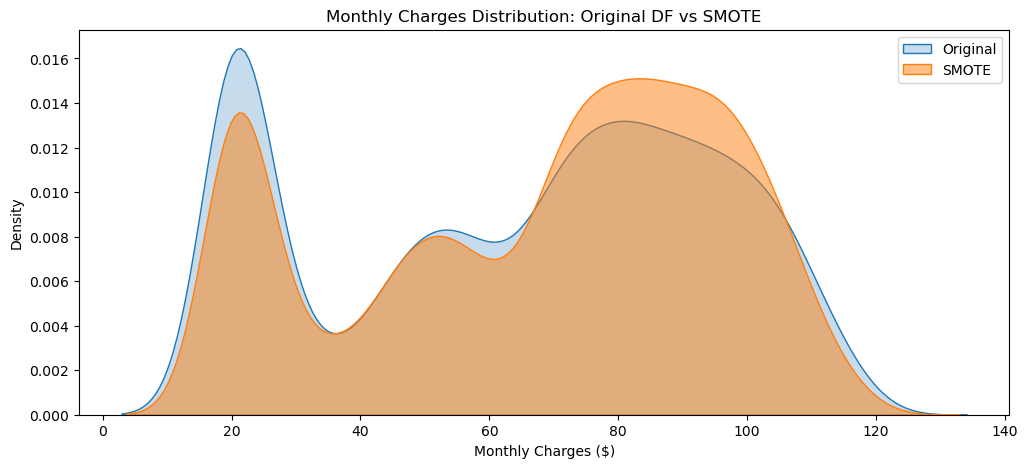

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.kdeplot(finaldf['MonthlyCharges'], label='Original', fill=True)
sns.kdeplot(smote_df['MonthlyCharges'], label='SMOTE', fill=True, alpha=0.5)
plt.title("Monthly Charges Distribution: Original DF vs SMOTE")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.legend()
plt.savefig("Smote-.png", dpi=300, bbox_inches='tight')
plt.show()

#The x-axis is MonthlyCharges (the value customers pay each month).
#The y-axis is density, which basically shows how common each value is.

- SMOTE did its job: balanced churn classes.
- Minor shifts in MonthlyCharges or tenure are expected.